In [1]:
import numpy as np
from prototypes.utility.data import DataLoader
from prototypes.utility.data import ProjectConfiguration
import matplotlib.pyplot as plt
from prototypes.classical.segmentation.transformers import BlackBarsRemover, OtsuThresholdingSegmentation
from prototypes.classical.descriptors.texture import LBPTransformer
import cv2

In [2]:
config = ProjectConfiguration("../config.json")

In [3]:
config.get_keys()

dict_keys(['DATASET_PATH', 'TRAIN_IMAGES_PATH', 'TRAIN_METADATA', 'TEST_METADATA', 'SAMPLE_SUBMISSION', 'IMAGE_WIDTH', 'IMAGE_HEIGHT', 'TARGET_COLUMNS', 'VECTORS_PATH', 'BATCH_SIZE', 'K_FOLDS', 'SAMPLE_PERCENTAGE', 'HYPER_PARAMETERS_PATH', 'VERSION'])

In [4]:
data_loader = DataLoader(data_path=config.get_value("TRAIN_IMAGES_PATH"), metadata_path=config.get_value("TRAIN_METADATA"))

In [5]:
cancer_images = data_loader.get_data(target=1, n_sample=300, width=128, height=128)
non_cancer_images = data_loader.get_data(target=0, n_sample=300, width=128, height=128)
otsu_thresholding = OtsuThresholdingSegmentation()
lbp_transformer = LBPTransformer(p=8, r=1)

In [6]:
cancer_images.shape

(300, 128, 128, 3)

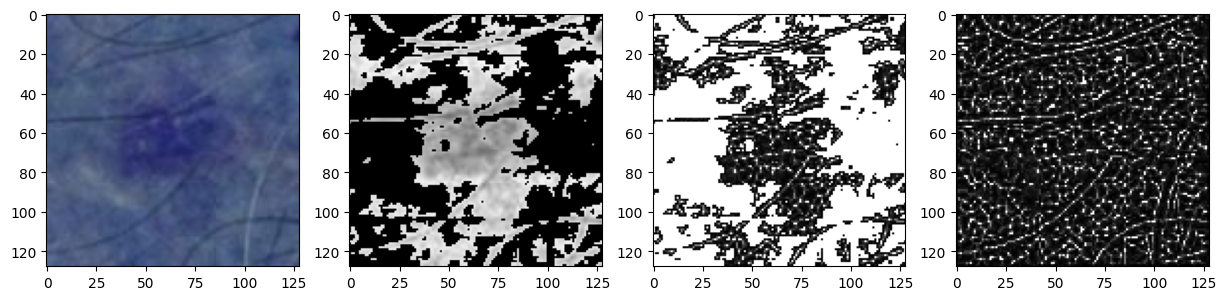

In [7]:
_, ax = plt.subplots(1, 4, figsize=(15, 15))

gray_scaled = cv2.cvtColor(cancer_images[4], cv2.COLOR_RGB2GRAY)
thresholded = otsu_thresholding.transform(gray_scaled)
lbp_thresholded = lbp_transformer.transform([thresholded])[0]
lbp_wholeimage = lbp_transformer.transform([gray_scaled])[0]

ax[0].imshow(cancer_images[4])
ax[1].imshow(thresholded, "gray")
ax[2].imshow(lbp_thresholded, "gray")
ax[3].imshow(lbp_wholeimage, "gray")

In [8]:
gray_scaled.mean(), gray_scaled.std()

(84.88677978515625, 12.53115496501298)

In [9]:
lbp_thresholded.mean(), lbp_thresholded.std()

(164.59722900390625, 114.234734345101)

In [10]:
lbp_wholeimage.mean(), lbp_wholeimage.std()

(40.052490234375, 59.00475685645487)

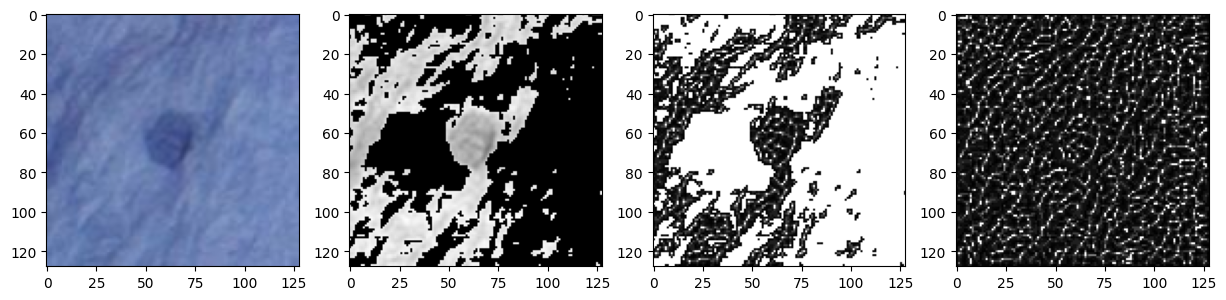

In [11]:
_, ax = plt.subplots(1, 4, figsize=(15, 15))

gray_scaled = cv2.cvtColor(non_cancer_images[4], cv2.COLOR_RGB2GRAY)
thresholded = otsu_thresholding.transform(gray_scaled)
lbp_thresholded = lbp_transformer.transform([thresholded])[0]
lbp_wholeimage = lbp_transformer.transform([gray_scaled])[0]

ax[0].imshow(non_cancer_images[4])
ax[1].imshow(thresholded, "gray")
ax[2].imshow(lbp_thresholded, "gray")
ax[3].imshow(lbp_wholeimage, "gray")

In [12]:
gray_scaled.mean(), gray_scaled.std()

(122.426025390625, 12.431114740628365)

In [13]:
lbp_thresholded.mean(), lbp_thresholded.std()

(173.33477783203125, 111.71933695857372)

In [14]:
lbp_wholeimage.mean(), lbp_wholeimage.std()

(40.3992919921875, 59.5602188332739)

# Distribution test

Pixel intesity in gray scale

In [15]:
bening_images = data_loader.get_data(target=0, width=64, height=64, mode="gray")

In [16]:
malign_images = data_loader.get_data(target=1, width=64, height=64, mode="gray")

In [17]:
lbp_benign = lbp_transformer.transform(bening_images)
lbp_malign = lbp_transformer.transform(malign_images)

lbp_thresholded_benign = otsu_thresholding.transform(lbp_transformer.transform(bening_images))
lbp_thresholded_malignant = otsu_thresholding.transform(lbp_transformer.transform(malign_images))

lbp_benign_mean, lbp_benign_std = np.mean(lbp_benign), np.std(lbp_benign)
lbp_malign_mean, lbp_malign_std = np.mean(lbp_malign), np.std(lbp_malign)

lbp_thresholded_benign_mean, lbp_thresholded_std = np.mean(lbp_thresholded_benign), np.std(lbp_thresholded_benign)
lbp_thresholded_malignant_mean, lbp_thresholded_malignant_std = np.mean(lbp_thresholded_malignant), np.std(lbp_thresholded_malignant)

bening_mean, bening_std = bening_images.mean(), bening_images.std()
malignant_mean, malignant_std = malign_images.mean(), malign_images.std()

In [18]:
x = np.linspace(0, 256, 256)

def gaussian_dist(x, mean, std):
    return (1/(std*np.sqrt(2*np.pi))) * np.exp(-(x-mean)**2/(2*std**2))

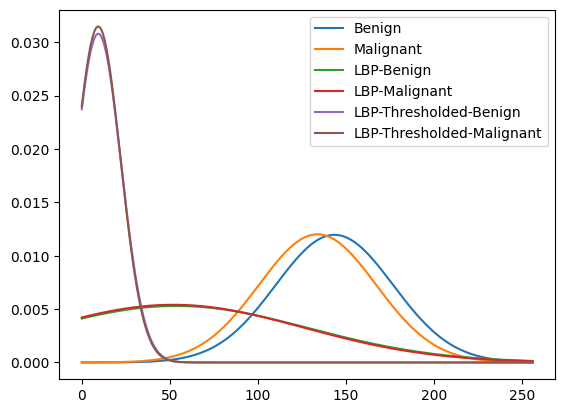

In [19]:
plt.plot(x, gaussian_dist(x, bening_mean, bening_std), label="Benign")
plt.plot(x, gaussian_dist(x, malignant_mean, malignant_std), label="Malignant")

plt.plot(x, gaussian_dist(x, lbp_benign_mean, lbp_benign_std), label="LBP-Benign")
plt.plot(x, gaussian_dist(x, lbp_malign_mean, lbp_malign_std), label="LBP-Malignant")

plt.plot(x, gaussian_dist(x, lbp_thresholded_benign_mean, lbp_thresholded_std), label="LBP-Thresholded-Benign")
plt.plot(x, gaussian_dist(x, lbp_thresholded_malignant_mean, lbp_thresholded_malignant_std), label="LBP-Thresholded-Malignant")

plt.legend()
plt.show()